In [1]:
# Step 1: Importing The Libraries
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
# Step 2: Importing The Data
data = sns.load_dataset('mpg')

In [3]:
# Step 3: Data Preprocessing/ Data Cleaning
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [4]:
data.drop(columns='name',inplace=True)
data['horsepower'].mean()

104.46938775510205

In [5]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


In [6]:
data['horsepower'] = data['horsepower'].fillna(104.4)

In [7]:
data['origin'].unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['origin'] = encoder.fit_transform(data['origin'])

In [9]:
data['origin'].unique()

array([2, 1, 0])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int32  
dtypes: float64(4), int32(1), int64(3)
memory usage: 23.4 KB


In [11]:
# Step 4: Splitting The Data
Ram = data.drop(columns='mpg') # Features
Rom = data['mpg'] # Target

In [12]:
from sklearn.model_selection import train_test_split
Ram_train, Ram_test, Rom_train, Rom_test = train_test_split(Ram, Rom, test_size=0.2,
                                                           random_state=232)

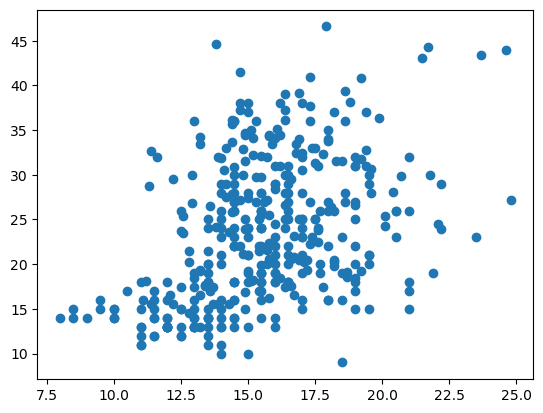

In [13]:
plt.scatter(data['acceleration'],data['mpg'])

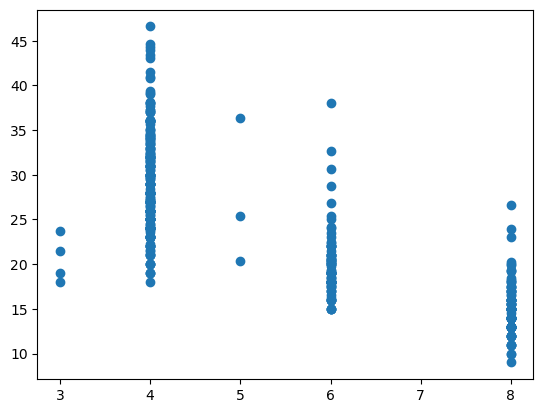

In [14]:
plt.scatter(data['cylinders'],data['mpg'])

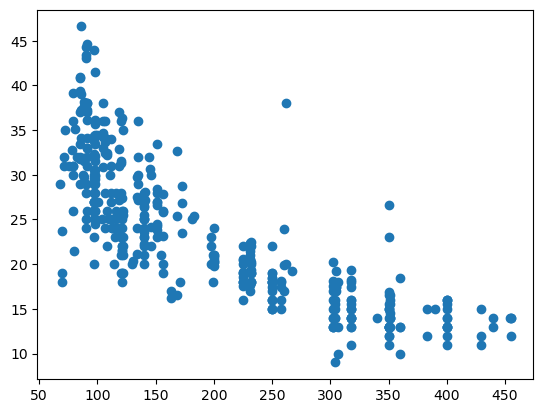

In [15]:
plt.scatter(data['displacement'],data['mpg'])

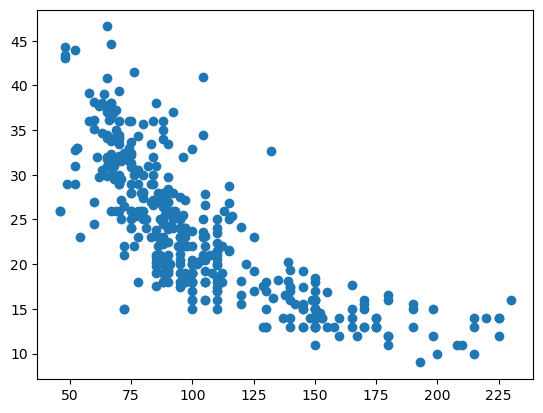

In [16]:
plt.scatter(data['horsepower'],data['mpg'])

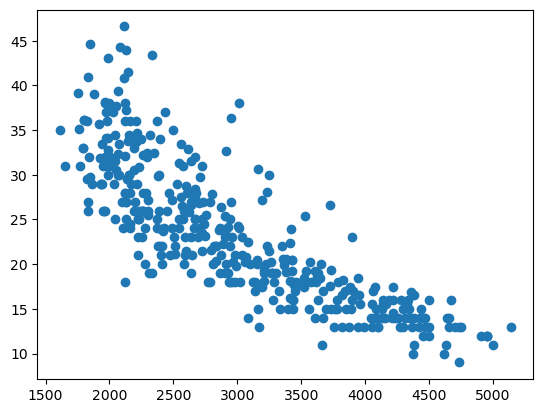

In [17]:
plt.scatter(data['weight'],data['mpg'])

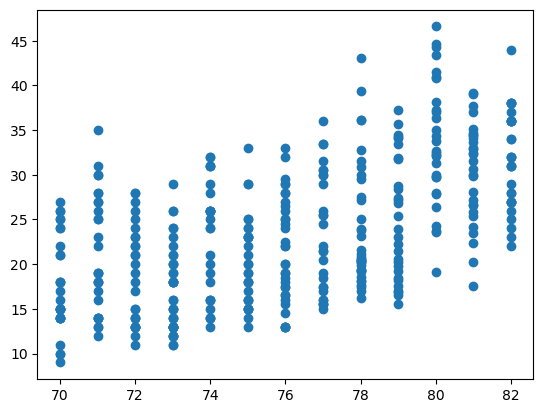

In [18]:
plt.scatter(data['model_year'],data['mpg'])

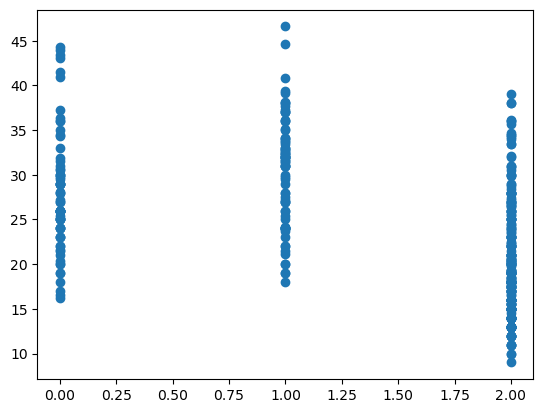

In [19]:
plt.scatter(data['origin'],data['mpg'])

In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)

In [21]:
Ram_train_transformed = poly.fit_transform(Ram_train)
Ram_test_transformed = poly.transform(Ram_test)

In [22]:
from sklearn.linear_model import LinearRegression
poly_model = LinearRegression()

In [23]:
poly_model.fit(Ram_train_transformed,Rom_train)

LinearRegression()

In [24]:
Rom_pred = poly_model.predict(Ram_test_transformed)

In [25]:
from sklearn.metrics import r2_score, mean_squared_error
print(r2_score(Rom_pred,Rom_test)*100)
print(mean_squared_error(Rom_pred,Rom_test)**0.5)

73.66384116861697
3.9075727111295153
